In [1]:
import pandas as pd

#### 加载 data 目录下 banklist.csv 数据集

In [3]:
banks = pd.read_csv('./data/banklist.csv')
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


#### 查看加载数据集中列的信息

In [4]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


#### 使用可视化的方式查看数据集中 CERT 这一列的数据分布情况

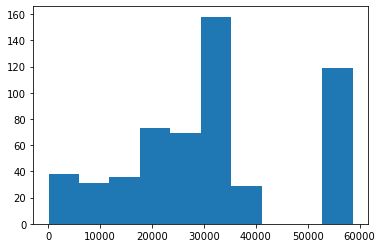

In [9]:
import matplotlib.pyplot as plt
# 创建图和坐标系
fig = plt.figure()
axes = fig.subplots(1, 1)

# 直方图
axes.hist(banks['CERT'], bins=10)

# 显示图形
plt.show()

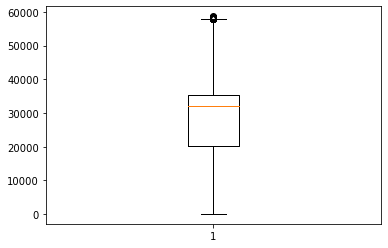

In [10]:
# 箱线图
# 创建图和坐标系
fig = plt.figure()
axes = fig.subplots(1, 1)

# 直方图
axes.boxplot(banks['CERT'])

# 显示图形
plt.show()

#### 统计银行数量最多的5个城市并进行可视化

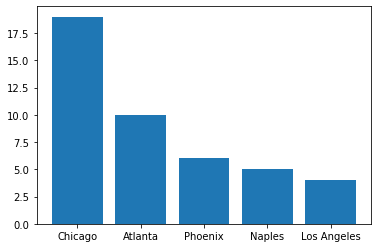

In [18]:
# 统计银行数量最多的5个城市并进行可视化
result = banks['City'].value_counts().head()

# 创建图和坐标系
fig = plt.figure()
axes = fig.subplots(1, 1)

# 条形图
axes.bar(result.index, result.values)

# 显示图形
plt.show()

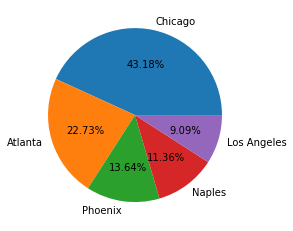

In [23]:
# 创建图和坐标系
fig = plt.figure()
axes = fig.subplots(1, 1)

# # 饼图
axes.pie(result.values, labels=result.index, autopct='%.2f%%')

# 显示图形
plt.show()

#### 将数据集中的 Closing Date 这一列转换为 datetime 类型

In [25]:
banks['Closing Date'] = pd.to_datetime(banks['Closing Date'])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 30.4+ KB


#### 在数据集中增加银行关闭 year 年份这一列

In [27]:
banks['year'] = banks['Closing Date'].dt.year
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,26-Jul-17,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,26-Jul-17,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,26-Jul-17,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,18-May-17,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,18-May-17,2017
...,...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,19-Aug-14,2001
549,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,18-Nov-02,2001
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,18-Feb-03,2001
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,17-Mar-05,2000


#### 统计每年倒闭的银行数据并进行可视化

In [29]:
result = banks.groupby('year').size()
result

year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

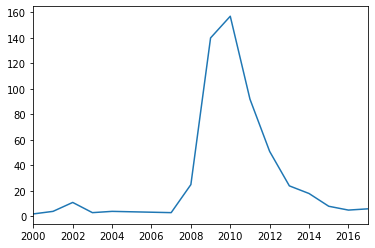

In [42]:
# 创建图和坐标系
fig = plt.figure()
axes = fig.subplots(1, 1)

# 折线图
axes.plot(result.index, result.values)

# 设置x轴刻度
axes.set_xlim(result.index[0], result.index[-1])

# 显示图形
plt.show()

(2000.0, 2017.0)

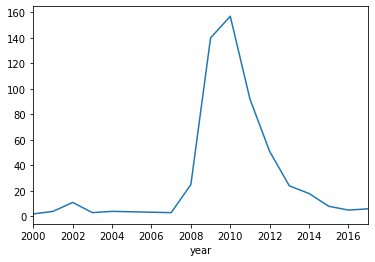

In [43]:
import seaborn as sns

# 折线图
axes = sns.lineplot(x=result.index, y=result.values)

# 设置x轴刻度
axes.set_xlim(result.index[0], result.index[-1])